In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

x_data = [4.0391, 1.3197, 9.5613, 0.5978, 3.5316, 0.1540, 1.6899, 7.3172, 4.5092, 2.9632]
y_data = [11.4215, 10.0112, 30.2991, 1.0625, 13.1776, -3.1976, 6.7367, 23.8550, 14.8951, 11.6137]
#x_data = [1, 2, 3, 4, 5]
#y_data = [1, 2, 3, 4, 5]

W = tf.Variable(tf.random_uniform([1], -5.0, 5.0))
b = tf.Variable(tf.random_uniform([1], -5.0, 5.0))

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = W * X + b

cost = tf.reduce_mean(tf.square(hypothesis - Y)) #가설의 값과 실제 Y 값의 차를 제곱하고 평균 최소화

a = tf.Variable(0.01)
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for step in range(2001):
    sess.run(train, feed_dict={X:x_data, Y:y_data})
    if step % 20 == 0:
        print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W), sess.run(b))
        
answer = sess.run(hypothesis, feed_dict={X:5})
print("When X=5, hypothesis" + str(answer))

0 33.3953 [ 2.73009133] [-2.86304641]
20 8.92455 [ 3.67657781] [-2.21409273]
40 8.08771 [ 3.60606313] [-1.81072044]
60 7.46901 [ 3.54541874] [-1.46388423]
80 7.01158 [ 3.49327374] [-1.16565835]
100 6.67338 [ 3.44843721] [-0.90923005]
120 6.42334 [ 3.40988469] [-0.68874091]
140 6.23848 [ 3.37673521] [-0.49915403]
160 6.10181 [ 3.34823203] [-0.33613843]
180 6.00075 [ 3.32372355] [-0.19597001]
200 5.92605 [ 3.30264997] [-0.07544664]
220 5.87081 [ 3.28452992] [ 0.02818494]
240 5.82997 [ 3.26894951] [ 0.11729223]
260 5.79978 [ 3.25555277] [ 0.19391085]
280 5.77746 [ 3.24403358] [ 0.25979108]
300 5.76095 [ 3.23412871] [ 0.31643793]
320 5.74875 [ 3.22561216] [ 0.36514556]
340 5.73973 [ 3.21828938] [ 0.40702671]
360 5.73306 [ 3.21199274] [ 0.44303796]
380 5.72813 [ 3.20657873] [ 0.47400218]
400 5.72448 [ 3.20192337] [ 0.50062656]
420 5.72179 [ 3.19792056] [ 0.52351946]
440 5.7198 [ 3.19447875] [ 0.54320395]
460 5.71832 [ 3.19151926] [ 0.56012946]
480 5.71723 [ 3.18897462] [ 0.57468289]
500 5.7

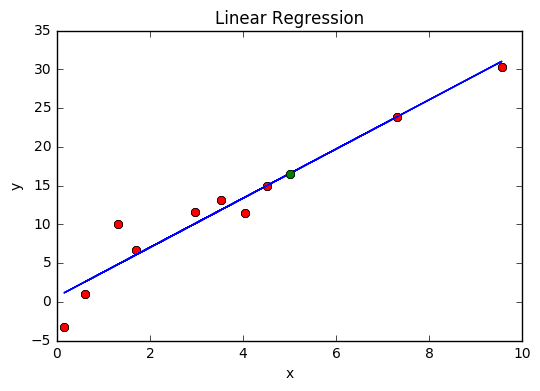

In [10]:
plt.figure(1)
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')

#주어진 값을 그래프에 표현
plt.plot(x_data, y_data, 'ro')

#예측한 일차함수를 직선으로 표시
plt.plot(x_data, sess.run(W) * x_data + sess.run(b), 'b')

#X=5일 때의 계산 값
plt.plot([5], answer, 'go')
plt.show()